# <Step1. 탐색> : 데이터의 기초 정보 살펴보기

# . csv
행이 ',' 콤마로 구분된 파일
# . tsv
행이 '   ' tab로 구분된 파일
# excel(.xlsx) 파일은 내보내기 후 csv 또는 tsv 로 전환

# 데이터의 외형적 분석
1. 데이터의 출처
2. 데이터의 크기
3. 데이터의 구성요소

샘플링 (sampleing) 어떤 자료로 부터 값을 추출하는 것

# [Chipotle 데이터셋의 기본 정보]

In [12]:
# pandas 모듈 임포트
import pandas as pd

# read_csv() 함수로 데이터를 Dataframe 형태로 불러옵니다.
# pd.read_csv("파일경로를 포함한 파일명", sep="구분자")
# 로데이터를 상대 경로로 불러오기
file_path = '../data/chipotle.tsv'
chipo = pd.read_csv(file_path, sep='\t')

print(chipo.shape)
print("------------------------------------")
print(chipo.info())

(4622, 5)
------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB
None


chipo 라는 Dataframe에서 순서대로 10개의 row 데이터를 보여줍니다.
head() 함수에 인수를 생략하면 기본 5개의 데이터를 보여줌

In [13]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [147]:
chipo.tail(10)

,order_id,quantity,item_name,choice_description,item_price
4612,1831,1,Carnitas Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",$9.25
4613,1831,1,Chips,NaN,$2.15
4614,1831,1,Bottled Water,NaN,$1.50
4615,1832,1,Chicken Soft Tacos,"[Fresh Tomato Salsa, [Rice, Cheese, Sour Cream]]",$8.75
4616,1832,1,Chips and Guacamole,NaN,$4.45
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75
4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$8.75


In [18]:
# columns() 함수로 컴럼의 정보를 보여줌
print(chipo.columns)
print("-------------------------")
print(chipo.index)

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')
-------------------------
RangeIndex(start=0, stop=4622, step=1)


[Chipotle 데이터셋의 수치적 특징 파악]

quantity와 item_price의 요약 통계

describe() 함수로 요약 통계량 출력하기

In [20]:
# order_id는 숫자와 의미를 가지지 않기 때문에 str로 변환
chipo['order_id'] = chipo['order_id'].astype(str)
# chipo dataframe에서 수치형 피처들의 요약 통계량을 확인
chipo.describe()

,quantity
count,4622.000000
mean,1.075725
std,0.410186
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,15.000000


unique 함수로 범주형 피처의 개수 출력하기

In [21]:
# order_id의 개수를 출력
len(chipo['order_id'].unique())

1834

In [56]:
# item_name의 개수를 출력
len(chipo['item_name'].unique())

50

In [57]:
# 가장 많이 주문한 item : top 10을 출력합니다.
item_count = chipo['item_name'].value_counts()[:10]
for idx, (val, cnt) in enumerate(item_count.iteritems(),1):
    print("Top" , idx , ":", val, cnt)

Top 1 : Chicken Bowl 726
Top 2 : Chicken Burrito 553
Top 3 : Chips and Guacamole 479
Top 4 : Steak Burrito 368
Top 5 : Canned Soft Drink 301
Top 6 : Steak Bowl 211
Top 7 : Chips 211
Top 8 : Bottled Water 162
Top 9 : Chicken Soft Tacos 115
Top 10 : Chips and Fresh Tomato Salsa 110


[item당 주문 개수와 총량 구하기]

In [58]:
# 아이템별 주문 개수를 출력합니다.
order_count = chipo.groupby('item_name')['order_id'].count()
order_count[:10] # 아이템별 주문 개수를 출력

item_name
6 Pack Soft Drink         54
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     11
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            162
Bowl                       2
Burrito                    6
Canned Soda              104
Name: order_id, dtype: int64

In [59]:
# 아이템별 주문 총량을 계산합니다.
item_quantity = chipo.groupby('item_name')['quantity'].sum()
item_quantity[:10] # 아이템별 주문 총량을 출력

item_name
6 Pack Soft Drink         55
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     12
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            211
Bowl                       4
Burrito                    6
Canned Soda              126
Name: quantity, dtype: int64

# 시각화로 분석 결과 살펴보기

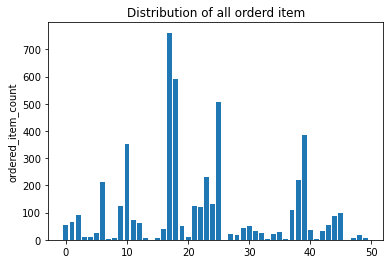

In [81]:
# %matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# 아이템별 주문의 총량을 막대 그래프로 시각화
item_name_list = item_quantity.index.tolist()

# numpy.arange(시작, 끝, 간격) 으로 배열 만들기
x_pos = np.arange(len(item_name_list))
order_cnt = item_quantity.values.tolist()

# bar()는 막대 그래프를 출력 하는 함수
plt.bar(x_pos, order_cnt, align='center')
plt.ylabel('ordered_item_count')
plt.title('Distribution of all orderd item')

plt.show()

아이템의 주문 개수를 출력

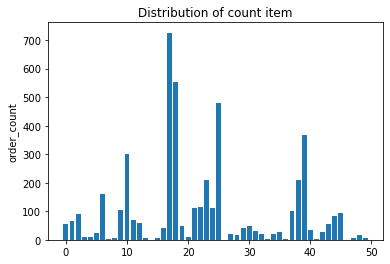

In [144]:
# oo = order_count.index.tolist()
# oo
x_pos = np.arange(len(oo))
tt = order_count.values.tolist()
plt.bar(x_pos, tt, align='center')
plt.ylabel('order_count')
plt.title('Distribution of count item')
plt.show()

item_pruce 피처 살펴보기

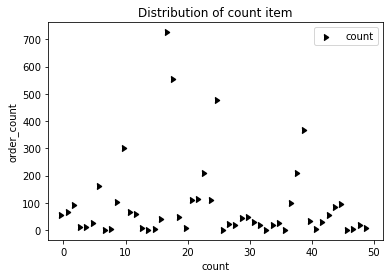

In [143]:
# scatter piot
plt.scatter(x_pos, tt, label="count", c ="black", marker=5 )
plt.xlabel('count')
plt.ylabel('order_count')
plt.title('Distribution of count item')
plt.legend(loc='upper right')
plt.show()

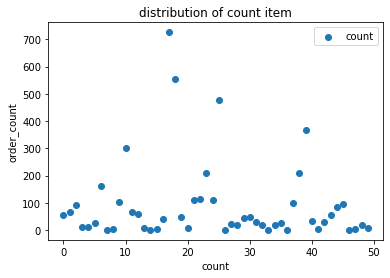

In [141]:
# scatter piot
plt.scatter(x_pos, tt, label="count")
plt.xlabel('count')
plt.ylabel('order_count')
plt.title('distribution of count item')
plt.legend(loc='best')
plt.show()

In [145]:
chipo.info()
print('---------')
chipo['item_price'].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   object
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(1), object(4)
memory usage: 180.7+ KB
---------


0     $2.39 
1     $3.39 
2     $3.39 
3     $2.39 
4    $16.98 
Name: item_price, dtype: object

In [133]:
chipo['item_name'].value_counts()[:10]

Chicken Bowl                    726
Chicken Burrito                 553
Chips and Guacamole             479
Steak Burrito                   368
Canned Soft Drink               301
Steak Bowl                      211
Chips                           211
Bottled Water                   162
Chicken Soft Tacos              115
Chips and Fresh Tomato Salsa    110
Name: item_name, dtype: int64

In [134]:
chipo['item_name'].unique().tolist()[:10]

['Chips and Fresh Tomato Salsa',
 'Izze',
 'Nantucket Nectar',
 'Chips and Tomatillo-Green Chili Salsa',
 'Chicken Bowl',
 'Side of Chips',
 'Steak Burrito',
 'Steak Soft Tacos',
 'Chips and Guacamole',
 'Chicken Crispy Tacos']